In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Life_Expectancy_Data.csv') #library importing and getting dataset

In [2]:
dataset.columns #printing dataset's columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [3]:
dataset = dataset[['Life_expectancy','Alcohol','percentage_expenditure',' BMI ','GDP','Income_composition_of_resources']]
#extracting important variables from dataset.

In [4]:
dataset #printing the dataset

,Life_expectancy,Alcohol,percentage_expenditure,BMI,GDP,Income_composition_of_resources
0,65.0,0.01,71.279624,19.1,584.259210,0.479
1,59.9,0.01,73.523582,18.6,612.696514,0.476
2,59.9,0.01,73.219243,18.1,631.744976,0.470
3,59.5,0.01,78.184215,17.6,669.959000,0.463
4,59.2,0.01,7.097109,17.2,63.537231,0.454
...,...,...,...,...,...,...
2933,44.3,4.36,0.000000,27.1,454.366654,0.407
2934,44.5,4.06,0.000000,26.7,453.351155,0.418
2935,44.8,4.43,0.000000,26.3,57.348340,0.427
2936,45.3,1.72,0.000000,25.9,548.587312,0.427


In [5]:
dataset.dropna(subset = ["Life_expectancy","Alcohol"," BMI ","percentage_expenditure","GDP","Income_composition_of_resources"], inplace=True)
#Deleting the "null" values from dataset.

In [6]:
dataset.isna().sum()

Life_expectancy                    0
Alcohol                            0
percentage_expenditure             0
 BMI                               0
GDP                                0
Income_composition_of_resources    0
dtype: int64

In [7]:
df=(dataset[['Life_expectancy','Alcohol','percentage_expenditure',' BMI ','GDP','Income_composition_of_resources']] != 0).all(axis=1)
#setting all 0 values into df array.

In [8]:
df

0        True
1        True
2        True
3        True
4        True
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2311, dtype: bool

In [9]:
dataset = dataset.loc[df] #deleting the df array from dataset so 0 values are deleted.

In [10]:
dataset #printing dataset.

,Life_expectancy,Alcohol,percentage_expenditure,BMI,GDP,Income_composition_of_resources
0,65.0,0.01,71.279624,19.1,584.259210,0.479
1,59.9,0.01,73.523582,18.6,612.696514,0.476
2,59.9,0.01,73.219243,18.1,631.744976,0.470
3,59.5,0.01,78.184215,17.6,669.959000,0.463
4,59.2,0.01,7.097109,17.2,63.537231,0.454
...,...,...,...,...,...,...
2928,50.0,4.64,1.040021,29.0,65.824121,0.419
2929,48.2,3.56,20.843429,28.6,325.678573,0.421
2930,46.6,3.88,29.814566,28.2,396.998217,0.414
2931,45.4,4.57,34.262169,27.9,414.796232,0.408


In [11]:
x = dataset[['Alcohol','percentage_expenditure',' BMI ','GDP','Income_composition_of_resources']] #x values that will predict y.
y = dataset.Life_expectancy #y value that will be predicted with x values.

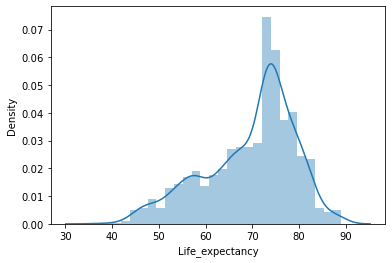

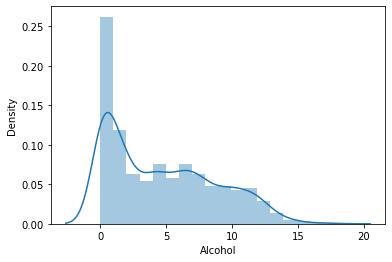

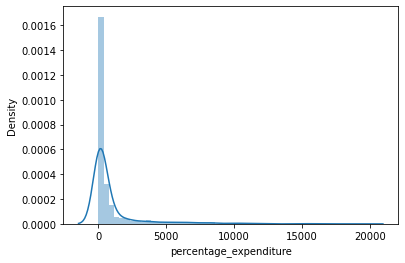

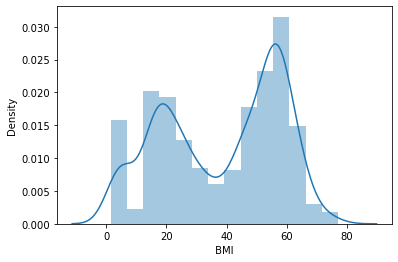

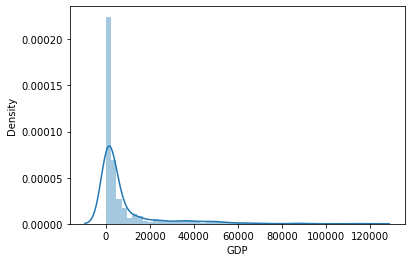

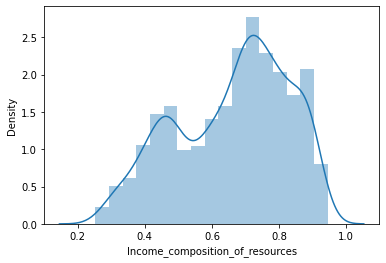

In [12]:
import seaborn as sns #importing seaborn library
import warnings #importing warnings
warnings.filterwarnings('ignore') #ignoring warnings

features_number = dataset.columns[dataset.dtypes != "object"]
for i in features_number:
    plt.figure()
    sns.distplot(dataset[i]) #show the density of every element graphical.

In [13]:
from sklearn.model_selection import train_test_split #importing train_test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 8, shuffle = False)
#defining the train and test values and how it will be executed.

In [14]:
from sklearn.linear_model import LinearRegression #importing LineerRegression.
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [15]:
reg.score(x_train,y_train) #printing the score of our lineer regression models (train).

0.8233709106728602

In [16]:
reg.score(x_test,y_test) #printing the score of our lineer regression models (test).

0.7777619235219634

In [17]:
reg.coef_ #this is coefficients. This means like Alcohol has -3 effect on Life Expectancy.

array([-3.73511391e-01,  9.92082237e-04,  1.99061567e-02, -1.44181981e-04,
        5.46794440e+01])

In [18]:
reg.intercept_ #this also called as constant (line).

34.74131554332306

In [19]:
predictions = reg.predict(x_train) #setting predictions array to predicted values with x_train.

In [20]:
predictions = predictions.round(2)
predictions # printing predictions.

array([61.3 , 61.12, 60.78, ..., 63.26, 62.82, 62.38])

In [21]:
from sklearn.metrics import mean_squared_error #importing MSE.

mean_squared_error(predictions,y_train) #calculating and printing MSE

16.98931016286645

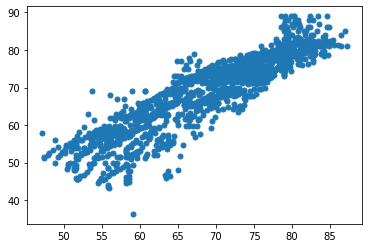

In [22]:
plt.scatter(predictions,y_train,25)#plotting the x and y values.